In [1]:
# Import file handling libraries:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import astropy for fits handling:
from astropy.io import fits

# Model fitting
from pyreduce import continuum_normalization
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline
from astropy.modeling import models, fitting
from astropy import modeling
from lmfit.models import SkewedGaussianModel

%matplotlib inline 
%matplotlib widget

Install colorlog for colored logging output


In [2]:
sns.set(style = "darkgrid" )

In [3]:
#Open the FITS file
hdul = fits.open('/Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits')

Filename: /Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     836   ()      
  1                1 BinTableHDU     24   212207R x 5C   [1D, 1D, 1D, 1D, 1J]   
Wavelength shape: (212207,)
Flux shape: (212207,)


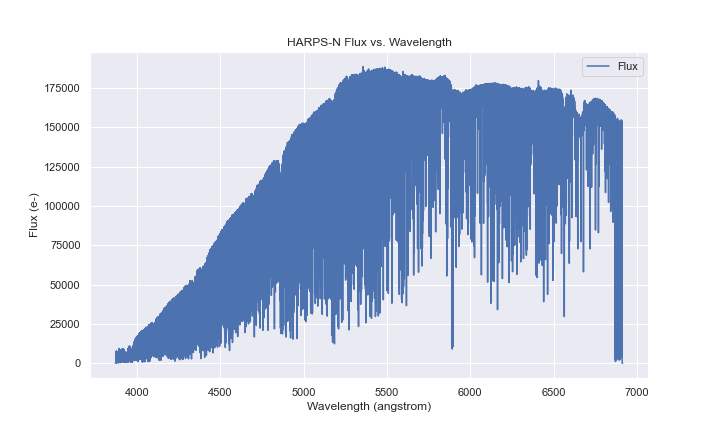

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the HARPS-N data file
filename = '/Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits'  # Replace with your actual HARPS-N file name
hdul = fits.open(filename)

# Print the structure of the data file
hdul.info()

# Extract the data from the first extension
data = hdul[1].data

# Extract the relevant columns
wavelength = data['wavelength']
wavelength_air = data['wavelength_air']
flux = data['flux']
error = data['error']
quality = data['quality']

# Print the shapes of the arrays
print("Wavelength shape:", wavelength.shape)
print("Flux shape:", flux.shape)

# Plot the flux vs. wavelength
plt.figure(figsize=(10, 6))
plt.plot(wavelength, flux, label='Flux')
plt.xlabel('Wavelength (angstrom)')
plt.ylabel('Flux (e-)')
plt.title('HARPS-N Flux vs. Wavelength')
plt.legend()
plt.show()

# Close the HDU list
hdul.close()

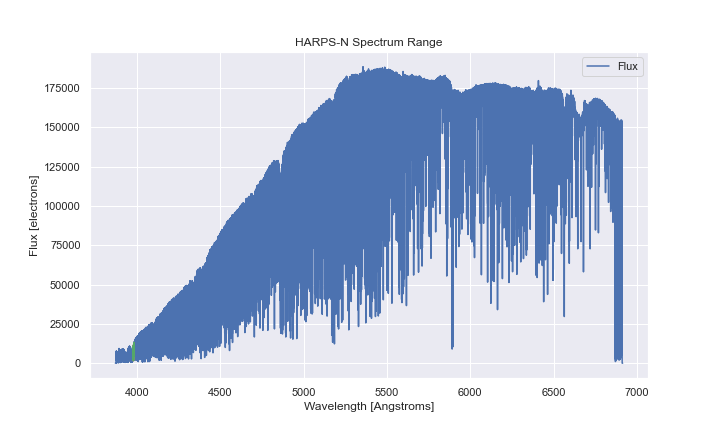

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the HARPS-N data file
filename = '/Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits'  # Replace with your actual HARPS-N file name
hdul = fits.open(filename)

# Extract the data from the first extension
data = hdul[1].data

# Extract the relevant columns
wavelength = data['wavelength']
flux = data['flux']

# Plot a specific range of wavelengths
start_index = 10000  # Adjust the start index as needed
end_index = 10500   # Adjust the end index as needed

plt.plot(wavelength[start_index:end_index], flux[start_index:end_index])
plt.title('HARPS-N Spectrum Range')
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Flux [electrons]')
plt.show()

# Close the HDU list
hdul.close()

Filename: /Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     836   ()      
  1                1 BinTableHDU     24   212207R x 5C   [1D, 1D, 1D, 1D, 1J]   


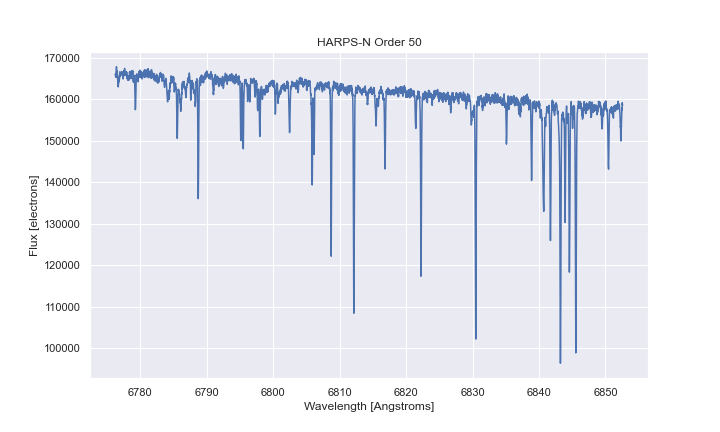

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the HARPS-N data file
filename = '/Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits'  # Replace with your actual HARPS-N file name
hdul = fits.open(filename)

# Print the structure of the data file to understand the extensions
hdul.info()

# Extract the data from the first extension
data = hdul[1].data

# Check if the data contains orders, similar to NEID
# Assuming orders are present, let's extract the specific order
order = 50  # The order number you want to plot

# Since HARPS-N data structure can vary, let's check the shape of wavelength and flux arrays
wavelength = data['wavelength']
flux = data['flux']

# Let's assume the orders are stored in separate segments
# For example, if each order has 4096 data points and there are 122 orders
order_length = 4096  # Adjust this value according to the actual data structure
order_start_index = order * order_length
order_end_index = order_start_index + order_length

# Plot the specific order
plt.figure(figsize=(10, 6))
plt.plot(wavelength[order_start_index:order_end_index], flux[order_start_index:order_end_index])
plt.title('HARPS-N Order {}'.format(order))
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Flux [electrons]')
plt.show()

# Close the HDU list
hdul.close()

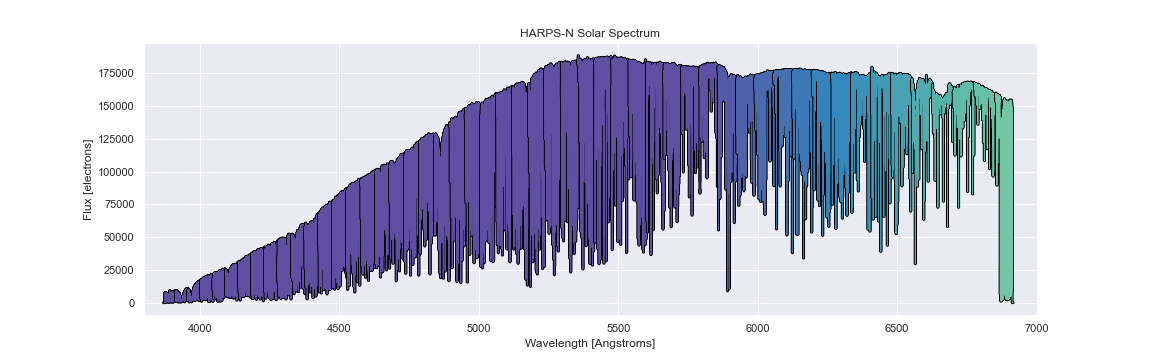

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the HARPS-N data file
filename = '/Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits'  # Replace with your actual HARPS-N file name
hdul = fits.open(filename)

# Extract the data from the first extension
data = hdul[1].data

# Extract the relevant columns
wavelength = data['wavelength']
flux = data['flux']

# Assuming the data is structured similarly to NEID and orders can be identified
norders = 122  # Number of orders, replace with the correct number if different
order_length = 4096  # Length of each order, replace with the correct number if different

# Sort out color map
cmap = plt.get_cmap('Spectral_r')
mycolors = cmap(np.linspace(-0.5, 1.2, norders))

fig, ax = plt.subplots(figsize=(16, 5))

# Plot each order
for order in range(norders):
    order_start_index = order * order_length
    order_end_index = order_start_index + order_length
    ax.plot(wavelength[order_start_index:order_end_index], flux[order_start_index:order_end_index], c='black', lw=3)
    ax.plot(wavelength[order_start_index:order_end_index], flux[order_start_index:order_end_index], c=mycolors[order], lw=1)

ax.set_title('HARPS-N Solar Spectrum')
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux [electrons]')
ax.set_xlim(3800, 7000)
plt.show()

# Close the HDU list
hdul.close()

In [10]:
flux[np.isnan(flux)] = 0
wavelength[np.isnan(wavelength)] = 0

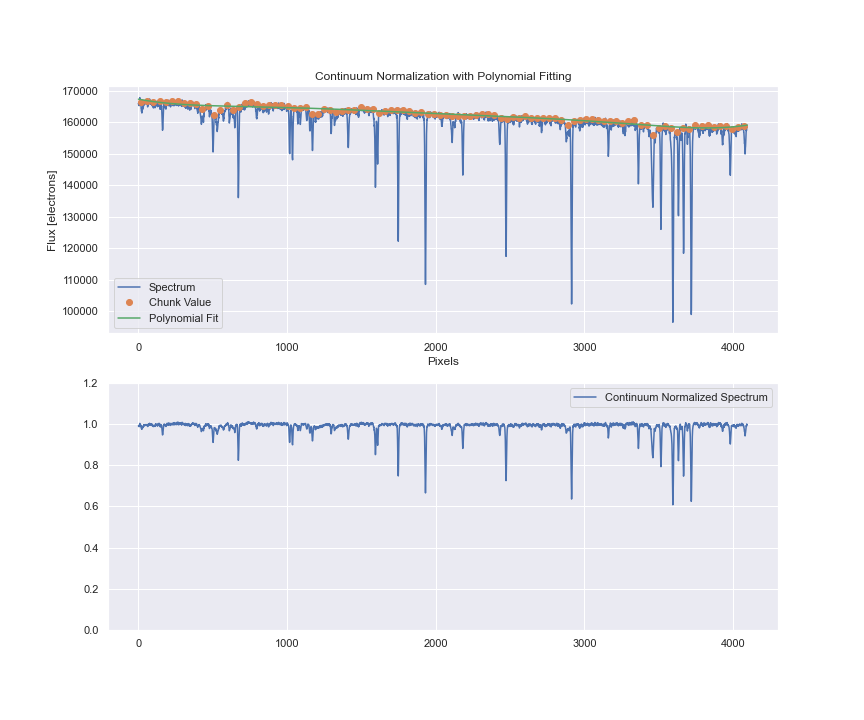

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline

# Load the HARPS-N data file
filename = '/Users/petrderuyter/Desktop/HARPSN/2015-12-04/r.HARPN.2015-12-04T09-46-42.800_S1D_A.fits'  # Replace with your actual HARPS-N file name
hdul = fits.open(filename)

# Extract the data from the first extension
data = hdul[1].data

# Extract the relevant columns
wavelength = data['wavelength']
flux = data['flux']

# Select a specific order to normalize
order = 50  # Replace with the actual order number if available
order_start_index = order * 4096  # Adjust this calculation as per the order structure
order_end_index = order_start_index + 4096

wave_order = wavelength[order_start_index:order_end_index]
flux_order = flux[order_start_index:order_end_index]

# Set NaNs to zero
flux_order[np.isnan(flux_order)] = 0
wave_order[np.isnan(wave_order)] = 0

pix_array = np.arange(flux_order.shape[0])

# Function to fit the spectrum with a polynomial in chunks
def chunked_continuum_fit(x, y, percentile_cut=95.0, nchunks=15, deg=5):
    chunks_x = np.zeros(nchunks)  # Chunk up spectrum and store mini-spectrum chunks in lists
    chunks_y = np.zeros(nchunks)
    npixels = len(x)
    pixels_per_chunk = npixels / nchunks
    for i in range(nchunks):  # Loop through each chunk
        chunk_i1 = int(i * pixels_per_chunk)
        chunk_i2 = int((i + 1) * pixels_per_chunk)
        if chunk_i2 > npixels:  # Chop end of last chunk
            chunk_i2 = npixels
        chunks_y[i] = np.nanpercentile(y[chunk_i1:chunk_i2], percentile_cut)  # Chunk y is xxth percentile of chunk
        chunks_x[i] = 0.5 * (x[chunk_i1] + x[chunk_i2 - 1])  # Chunk x is just center of chunk
    smooth_y = savgol_filter(chunks_y, 11, 1)  # Add some smoothing to avoid "falling" into lines
    pfit = np.polyfit(chunks_x, smooth_y, deg=deg)  # Fit polynomial to chunks
    cs = CubicSpline(chunks_x, chunks_y)
    return np.polyval(pfit, x), cs, chunks_x, chunks_y  # Return continuum array generated from polynomial fit

# Apply the continuum fit to the selected order
chunkfit, cs, chunks_x, chunks_y = chunked_continuum_fit(pix_array, flux_order, percentile_cut=90.0, nchunks=100, deg=7)

# Plot the results
fig, ax = plt.subplots(nrows=2, figsize=(12, 10))
ax[0].plot(flux_order, label='Spectrum')
ax[0].plot(chunks_x, chunks_y, 'o', label='Chunk Value')
ax[0].plot(chunkfit, label='Polynomial Fit')
ax[0].set_title('Continuum Normalization with Polynomial Fitting')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Flux [electrons]')
ax[0].legend()
ax[1].plot(flux_order / chunkfit, label='Continuum Normalized Spectrum')
ax[1].set_ylim(0, 1.2)
ax[1].legend()
plt.show()

# Close the HDU list
hdul.close()

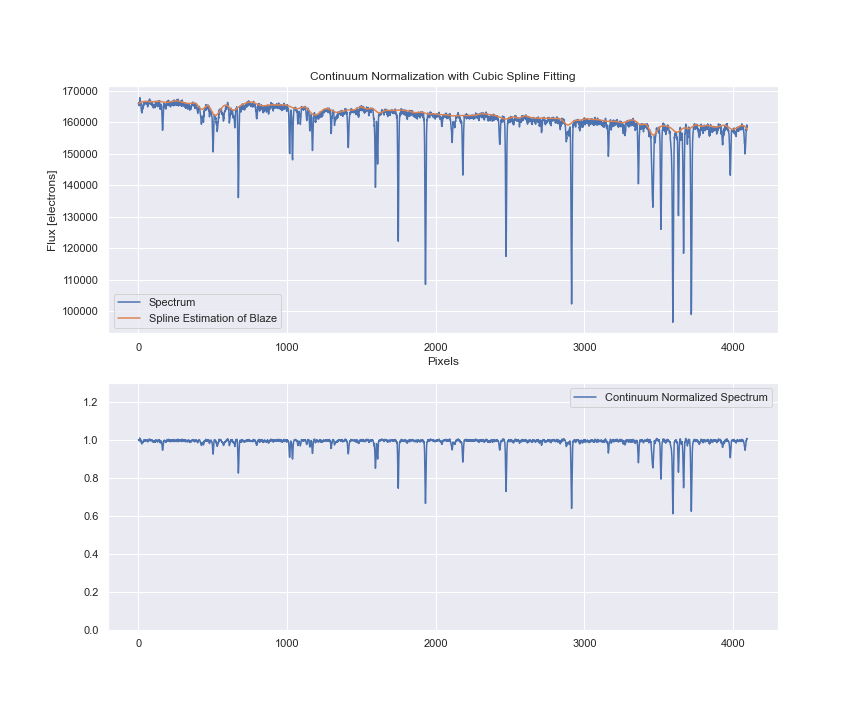

In [12]:
#Cubic Spline

# Cubic Spline Fitting Plot
fig, ax = plt.subplots(nrows=2, figsize=(12, 10))
ax[0].plot(flux_order, label='Spectrum')
ax[0].plot(cs(pix_array), label='Spline Estimation of Blaze')
ax[0].set_title('Continuum Normalization with Cubic Spline Fitting')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Flux [electrons]')
ax[0].legend()
ax[1].plot(flux_order / cs(pix_array), label='Continuum Normalized Spectrum')
ax[1].set_ylim(0, 1.3)
ax[1].legend()
plt.show()

# Close the HDU list
hdul.close()

## Gaussian model fitting

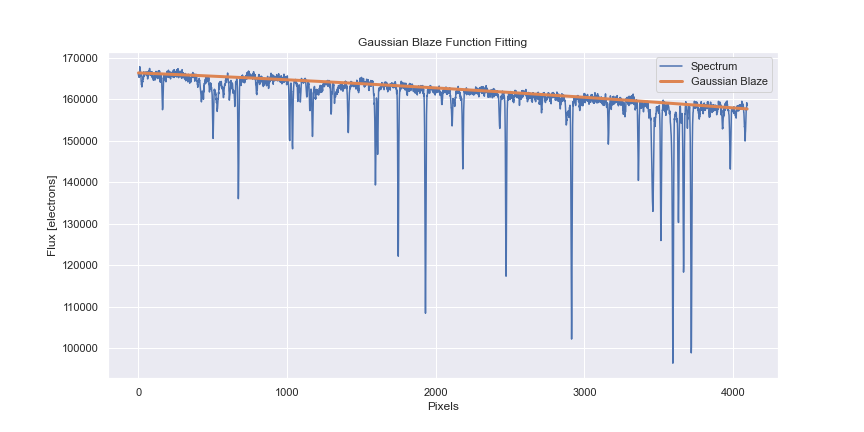

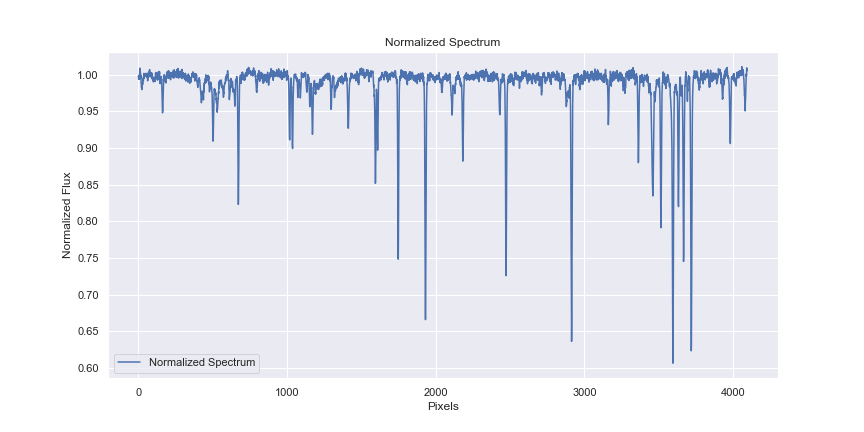

In [13]:
blaze_init = models.Gaussian1D(amplitude=2e5, mean=pix_array[len(pix_array)//2], stddev=len(pix_array)/10)
fit_blaze = fitting.LevMarLSQFitter()
blaze = fit_blaze(blaze_init, chunks_x, chunks_y)

# Plot the original spectrum and the Gaussian blaze function
plt.figure(figsize=(12, 6))
plt.plot(flux_order, label='Spectrum')
plt.plot(blaze(pix_array), label='Gaussian Blaze', lw=3)
plt.xlabel('Pixels')
plt.ylabel('Flux [electrons]')
plt.legend()
plt.title('Gaussian Blaze Function Fitting')
plt.show()

# Plot the normalized spectrum
plt.figure(figsize=(12, 6))
plt.plot(flux_order / blaze(pix_array), label='Normalized Spectrum')
plt.xlabel('Pixels')
plt.ylabel('Normalized Flux')
plt.legend()
plt.title('Normalized Spectrum')
plt.show()

# Close the HDU list
hdul.close()

## Skewed Gaussian Model

In [14]:
model = SkewedGaussianModel()

# set initial parameter values
params = model.make_params(amplitude=2e5, center=4500, sigma=1000, gamma=1)

# adjust parameters  to best fit data.
result = model.fit(chunks_y, params, x=chunks_x)

skew_blaze = np.interp(pix_array, chunks_x, result.best_fit)

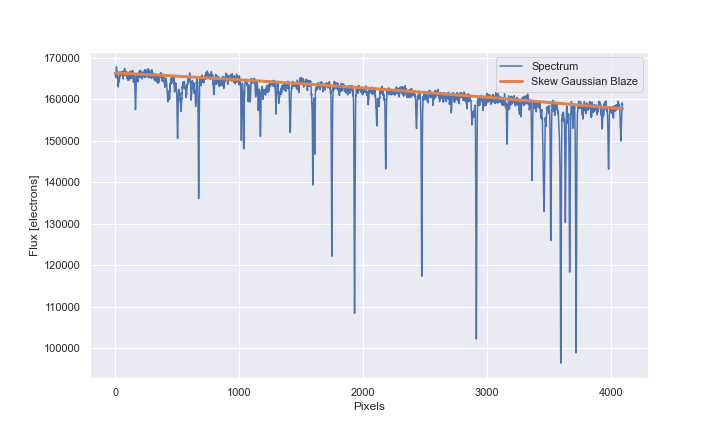

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
plt.plot(flux_order, label='Spectrum')
plt.plot(skew_blaze,lw=3,label='Skew Gaussian Blaze')
plt.legend()
plt.xlabel('Pixels')
plt.ylabel('Flux [electrons]')
plt.show()

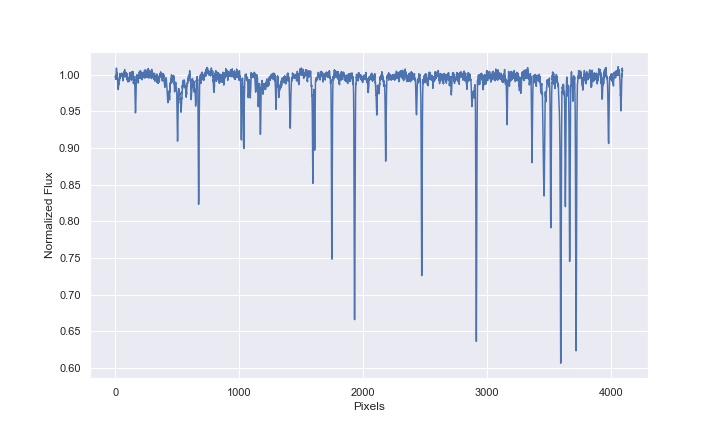

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
plt.plot(flux_order/skew_blaze,label='spectrum')
plt.xlabel('Pixels')
plt.ylabel('Normalized Flux')
plt.show()

## Peak Fitting

### There are many ways to look for peaks. A simple one might be to just have an intensity threshold. Using the cubic spline continuum normalization in this example.

In [17]:
spec_cont = (flux_order)/cs(pix_array)

In [18]:
thresh = 0.8
idx = np.where(spec_cont < thresh)

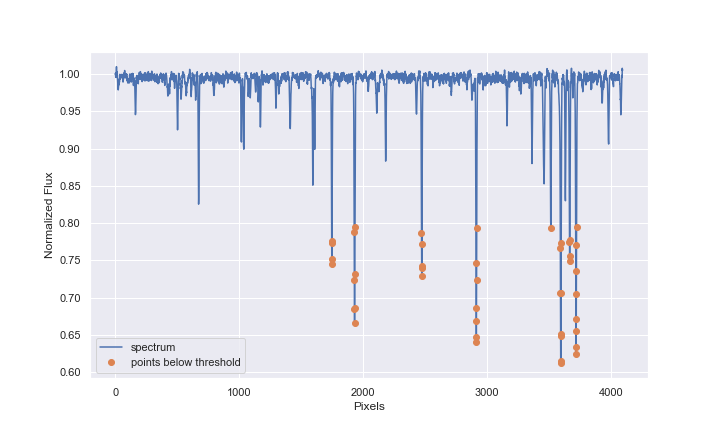

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
plt.plot(pix_array,spec_cont,label='spectrum')
plt.plot(pix_array[idx],spec_cont[idx],'o',label='points below threshold')
plt.legend()
plt.xlabel('Pixels')
plt.ylabel('Normalized Flux')
plt.show()

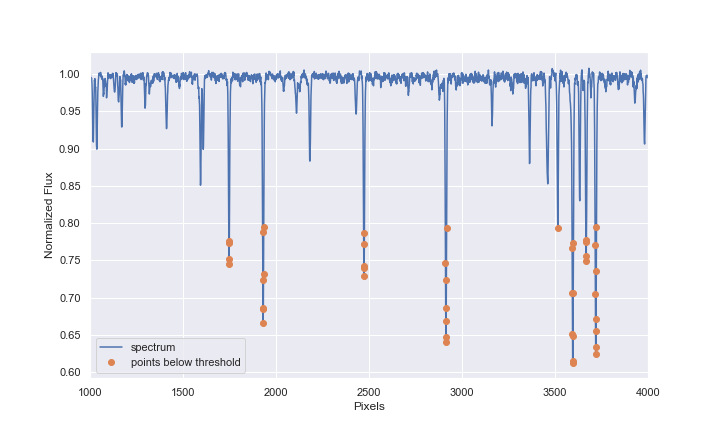

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
plt.plot(pix_array,spec_cont,label='spectrum')
plt.plot(pix_array[idx],spec_cont[idx],'o',label='points below threshold')
plt.legend()
plt.xlabel('Pixels')
plt.ylabel('Normalized Flux')
plt.xlim(1000,4000)
plt.show()

In [29]:
# Take first derivative
derivative = np.gradient(spec_cont)

# Smooth out some of the noise
smooth_derivative = savgol_filter(derivative, 11, 5)

# Find zero crossings
zero_crossings = np.where(np.diff(np.signbit(smooth_derivative)))[0]

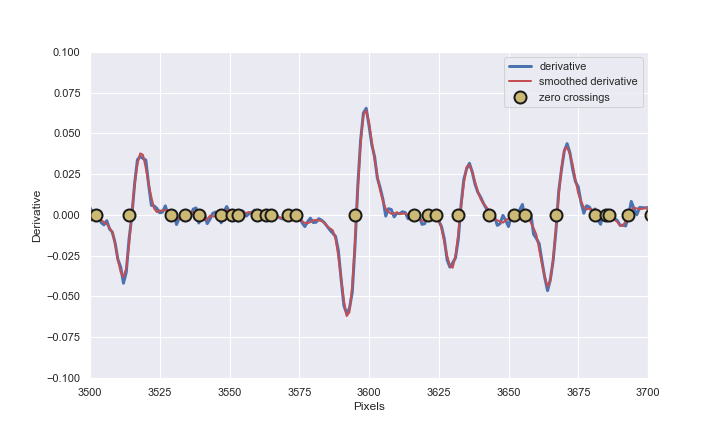

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
plt.plot(derivative,lw=3,label='derivative')
plt.plot(smooth_derivative,c='r',lw=2,label='smoothed derivative')
plt.plot(zero_crossings,np.zeros(len(zero_crossings)), 'yo',ms=12,markeredgecolor='k',
         markeredgewidth=2,label='zero crossings')
plt.xlim(3500,3700)
plt.ylim(-0.1,0.1)
plt.xlabel('Pixels')
plt.ylabel('Derivative')
plt.legend()
plt.show()

In [35]:
good_lines = []

for zero_crossing in zero_crossings:
    # cut off pixels at very edge of detector
    if 20 < zero_crossing < 9000: 
        
        # Make sure first derivate is going from negative to positive
        slope = smooth_derivative[zero_crossing-1] - smooth_derivative[zero_crossing+1]
        
        # Im setting these numbers after experimenting with different slope cuts
        if -0.38 < slope < -0.01:
            good_lines.append(zero_crossing)
            #print(zero_crossing,slope)

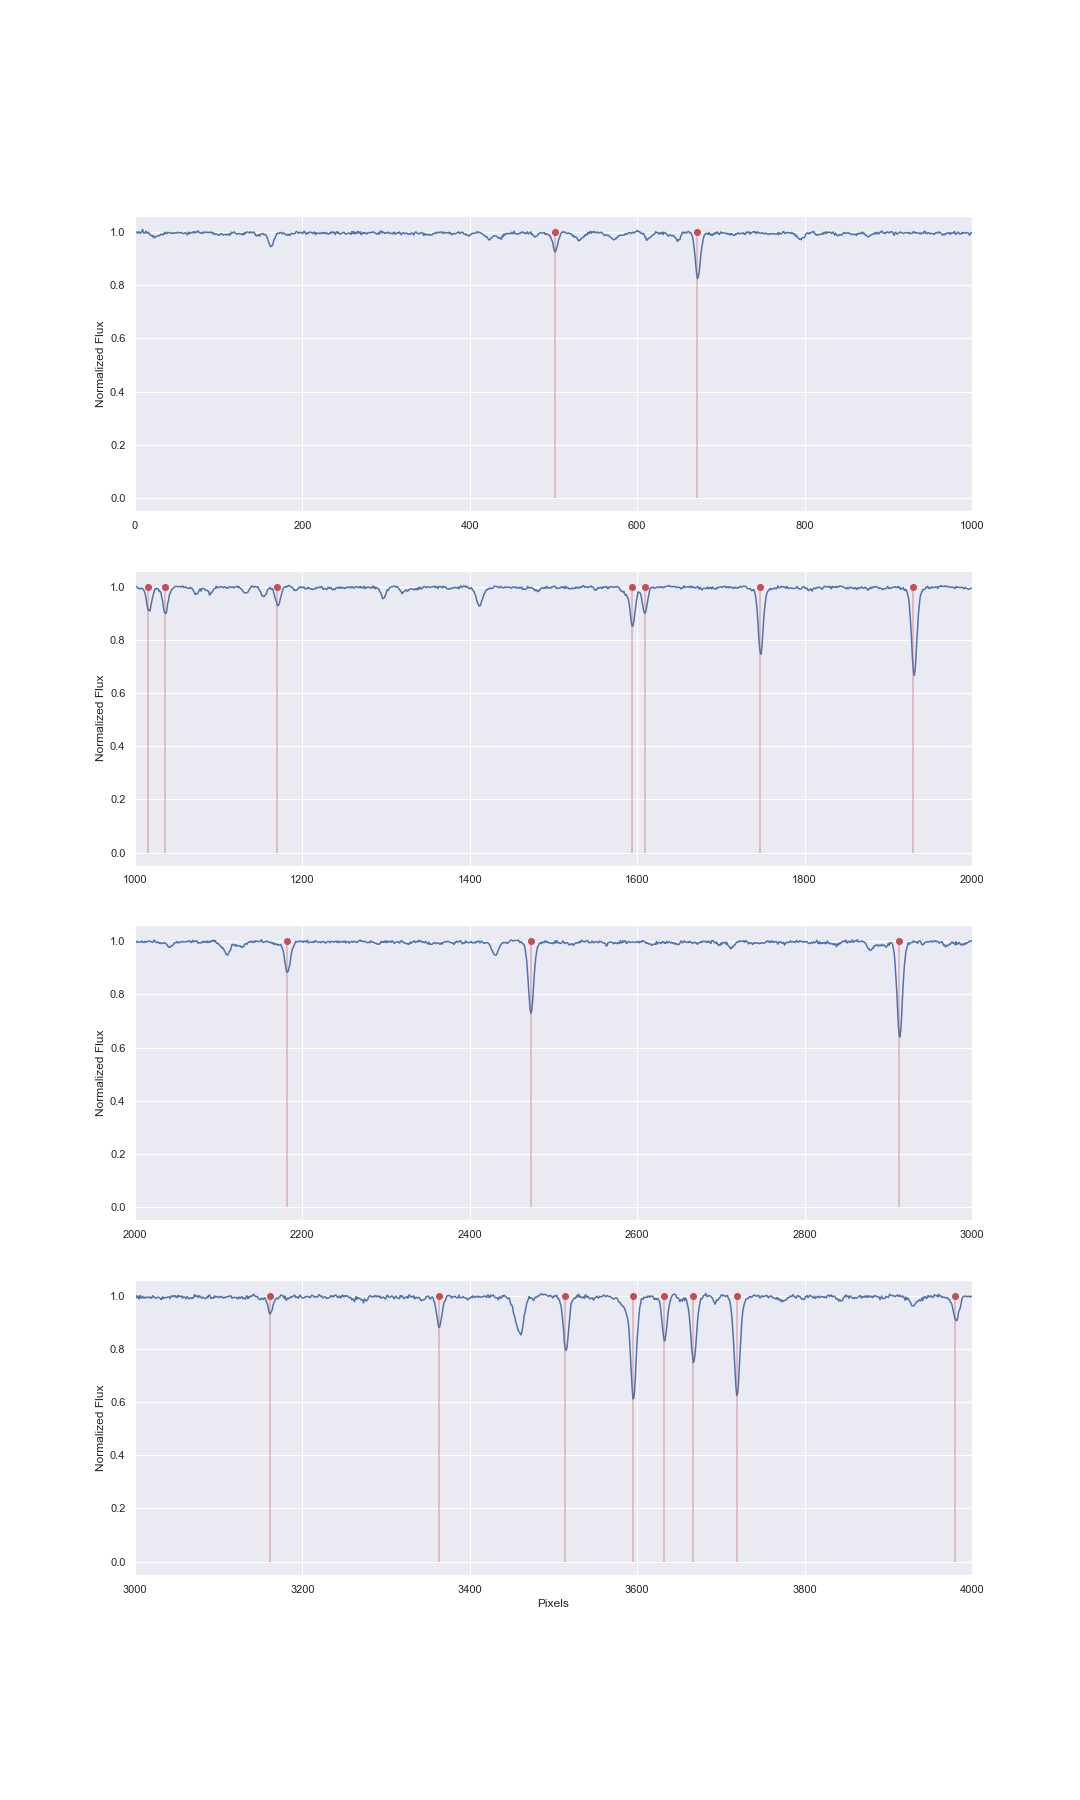

In [25]:
fig, axs = plt.subplots(nrows=4,figsize=(15,25))

for i in range(4):
    axs[i].plot(spec_cont)
    axs[i].plot(good_lines,np.repeat(1,len(good_lines)),'ro')
    axs[i].vlines(good_lines,0,1,color='r',alpha=0.4)
    axs[i].set_xlim(i*1000,(i+1)*1000)
    axs[i].set_ylabel('Normalized Flux')
axs[i].set_xlabel('Pixels')
plt.show()

In [39]:
# We will pick a clean line to look at, 
# and examine some number of pixels around the supposed peak
pixrange = 15
linenum = 104
schunk = spec_cont[(good_lines[linenum]-pixrange):(good_lines[linenum]+pixrange)]
# Let's flip the chunk so that the fitting routine has an easier time
upside = -schunk + 1
xchunk = np.arange(len(schunk))

# Gaussian model to use - you need to give it reasonable starting parameters
g_init = models.Gaussian1D(amplitude=2., mean=pixrange, stddev=6)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xchunk, upside)

IndexError: list index out of range

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
plt.plot(good_lines[linenum]+xchunk, upside, 'o',ms=8,label='Data')
plt.plot(good_lines[linenum]+xchunk, g(xchunk),lw=3,label='Gaussian Fit')
plt.xlabel('Pixels')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()
print(g)

In [ ]:
wchunk = wave[order,(good_lines[linenum]-pixrange):(good_lines[linenum]+pixrange)]
line_centroid_pixel = good_lines[linenum] -pixrange + g.mean.value
line_centroid_wavelength = np.interp(line_centroid_pixel, pix_array, wave[order,:])

In [ ]:
# Create a larger plot
fig, ax = plt.subplots(figsize=(10, 6))  # Set the width and height of the figure
ax.plot(wchunk, upside, 'o', ms=8, label='Data')
ax.plot(wchunk, g(xchunk), lw=3, label='Gaussian Fit')
ax.vlines(line_centroid_wavelength, 0, 1, color='r', linestyle='--', lw=3, label='Gaussian Centroid')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Normalized Flux')
ax.legend()

plt.show()